<a href="https://www.kaggle.com/code/robertmounce/wheel-fun-rentals-cleaning-and-basic-analysis?scriptVersionId=189482005" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Bike Maintenance and Repair Analysis
![Bike Image](https://static.wixstatic.com/media/77b621_4761e9a32ca041bca2894c7f29a0935f~mv2.jpeg/v1/crop/x_0,y_837,w_3024,h_2358/fill/w_397,h_311,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/05375D3F-A6B0-46E1-884F-1660C8F33D16.jpeg)
Working as Head Mechanic and Assistant Area Manager for 2 years for the #1 Recreation Rentals by Entrepreneur Magazine for 5 years. I set up a free product management system for the four locations I grew into with 10 product types with 300+ total products with 400 reports from January 2020 to September 2021 where I and a part time mechanic managed with no prior mechanic experience using Notion for managment and data collection and Chillipepper API for a QR Code for team members to report when bikes were down to give live status on locations.
[Client Presentation](https://csulb-my.sharepoint.com/:p:/g/personal/robert_mounce01_student_csulb_edu/EXkFWLKfuAJOgx7BZte7lRUBGU5c9LBl0wC2mJGQEOM5dA?e=78PgpV)

## Objective of Analysis
- Analyze the frequency and types of bike breakdowns
- Evaluate the efficiency of the repair process
- Identify trends and patterns in bike maintenance and repairs
    
## Analysis Questions and Conclusions
1. Has the Online Maintenance Board help productivity? (Upgrade from white-boards?)
   - The rate at productivity was over 83% over a year 
       - Using a QR-code to API reporting system starting in October 2021
- [ ] Using OC Park attendence how did it correlate to Warner, Edinger and Yorba
    

3. Ranking of location repair stats 
    1. Yorba (Average of 20 days, Median of 6 days) 
    2. Edinger (Average of 21 days, Median of 7 days)
    3. Watefront (Average of 39 days, Median of 14 days)
    4. Warner (Average of 45 days, Median of 42 days) 

4. Demonstrate reoccuring problems? Flat Tires, broken wheels, etc.?
    - Flat Tires, Broken Chains were the most reported problems, see Description Word Plot for more details
    
5. how much did having to order a part affect the repair date of the products?
6. using product_ids how do products behaves over time, dependent on attendence?


# Step 1 : Import Datasets

In [381]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_columns', None)
import os
import warnings
import datetime
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import re
import regex as re
from sklearn import preprocessing 


In [382]:
df = pd.read_csv('/kaggle/input/wheelfun-database/MB_Reports.csv')

In [383]:
pk = pd.read_csv('/kaggle/input/wheelfun-database/Park_Attendence.csv')

# Step 2 : Data Exploration

Text(0.5, 1.0, 'Total Reports by Location')

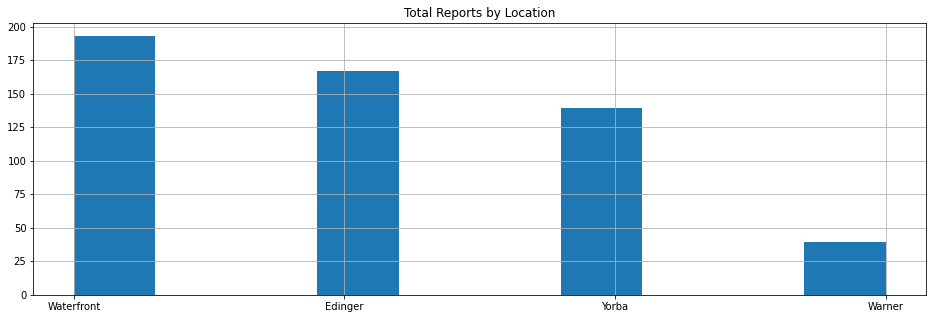

In [384]:
# Distribution of Reports by Location
plt.figure(figsize=(16,5))
df['Location'].hist()
plt.title('Total Reports by Location')

In [385]:
# Group by 'Location' and count the 'Description' column
grouped = df.groupby('Location')['Description'].count().reset_index()

# Rename the columns for clarity
grouped.columns = ['Location', 'Description_Count']

print(grouped)

     Location  Description_Count
0     Edinger                167
1      Warner                 39
2  Waterfront                193
3       Yorba                139


Text(0.5, 1.0, 'Total Reports by Product')

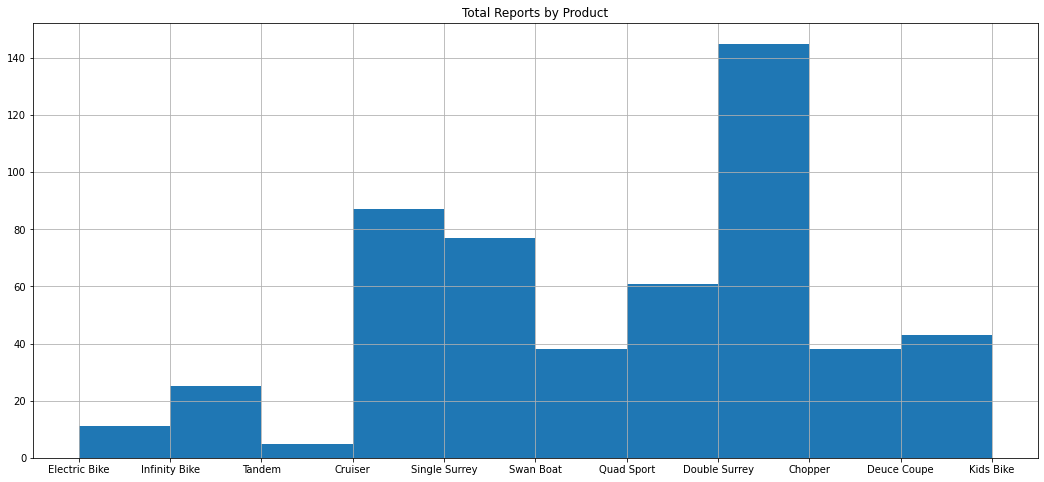

In [386]:
# Distribution of Products
plt.figure(figsize=(18,8))
df['Product'].hist()
plt.title('Total Reports by Product')

In [387]:
df.count()
# Should be about 450 - 540 total reports based on required input (Description, Location, and Status column counts)
# Delete the Location_Part columns (Ex.'Warner Part') due to operational use only for oredering parts using relational parts database
# Deleting the Attatchment feature column that stored photos of the broken part that needed to replaced for easy communication

Location                538
Down Date               540
Product                 530
Description             540
Mechanic Notes          117
Attatchment feauture     27
Status                  447
Part Comment             37
Product #               344
Reporter                396
Category                450
Last Edited             540
Last Edited by          540
Mechanic                 90
1 st attempt date       116
Edinger Part              0
Warner Part               6
Waterfront Part           2
Yorba Part                8
dtype: int64

In [388]:
df.head()

,Location,Down Date,Product,Description,Mechanic Notes,Attatchment feauture,Status,Part Comment,Product #,Reporter,Category,Last Edited,Last Edited by,Mechanic,1 st attempt date,Edinger Part,Warner Part,Waterfront Part,Yorba Part
0,Waterfront,10/6/2020,Electric Bike,Broken Mode Buttons,Need to find local seller to buy and get corpo...,Maintenance%20Board%20f707a518e7264cea97a5acf1...,Done,NaN,NaN,Rob,NaN,12/30/2020,Robert Mounce,NaN,NaN,NaN,NaN,NaN,NaN
1,Waterfront,10/6/2020,Infinity Bike,Needs new Spokes,Replaced 5 infinity rims (total up): 6/9 are u...,NaN,Done,NaN,NaN,Rob,NaN,12/30/2020,Robert Mounce,NaN,NaN,NaN,NaN,NaN,NaN
2,Waterfront,10/6/2020,Infinity Bike,Needs a kickstand,NaN,NaN,Done,NaN,NaN,Rob,NaN,12/30/2020,Robert Mounce,NaN,NaN,NaN,NaN,NaN,NaN
3,Waterfront,10/6/2020,Infinity Bike,Rear Shifting nut,Call max to know how to install,NaN,"Done, Received",NaN,NaN,NaN,NaN,1/16/2021,Robert Mounce,NaN,NaN,NaN,NaN,NaN,NaN
4,Edinger,10/6/2020,Tandem,Needs Bottom Bracket bolt,NaN,NaN,Done,NaN,NaN,NaN,NaN,12/30/2020,Robert Mounce,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
df.tail()
# Lots of null values when first starting to use the reports that later was implemented

,Location,Down Date,Product,Description,Mechanic Notes,Attatchment feauture,Status,Part Comment,Product #,Reporter,Category,Last Edited,Last Edited by,Mechanic,1 st attempt date,Edinger Part,Warner Part,Waterfront Part,Yorba Part
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [390]:
print("Data Types")
df.dtypes
# Tackle data types for all columns

Data Types


Location                 object
Down Date                object
Product                  object
Description              object
Mechanic Notes           object
Attatchment feauture     object
Status                   object
Part Comment             object
Product #                object
Reporter                 object
Category                 object
Last Edited              object
Last Edited by           object
Mechanic                 object
1 st attempt date        object
Edinger Part            float64
Warner Part             float64
Waterfront Part         float64
Yorba Part              float64
dtype: object

In [391]:
print("Null Values")
df.isnull().sum()
# I have a half empty file

Null Values


Location                461
Down Date               459
Product                 469
Description             459
Mechanic Notes          882
Attatchment feauture    972
Status                  552
Part Comment            962
Product #               655
Reporter                603
Category                549
Last Edited             459
Last Edited by          459
Mechanic                909
1 st attempt date       883
Edinger Part            999
Warner Part             993
Waterfront Part         997
Yorba Part              991
dtype: int64

In [392]:
df['Status'].value_counts()

Done                                    330
Done, Planned                            47
Planned                                  15
Done, Received                            7
Corporate, Done                           7
Done, Ordered                             5
Done, Planned, Training                   5
Received                                  4
Done, Next Week                           3
Corporate                                 3
To Be Looked At                           2
Corporate, Needs to be Ordered            2
Ordered                                   2
Done, Next Week, Received                 2
Back Order, Done                          1
Done, Ordered, Planned                    1
Back Order, Done, Ordered                 1
Back Order, Corporate                     1
Done, To Be Looked At                     1
Back Order                                1
Next Week                                 1
Corporate, Done, Ordered                  1
Corporate, Done, Next Week, Plan

## Park Attendence Data

In [393]:
pk.describe()

,Year,Visitors / day,Month (num)
count,72.000000,72.000000,72.000000
mean,2020.000000,1736.472222,6.500000
std,0.822226,647.525887,3.476278
min,2019.000000,183.000000,1.000000
25%,2019.000000,1367.250000,3.750000
50%,2020.000000,1758.000000,6.500000
75%,2021.000000,2205.250000,9.250000
max,2021.000000,3096.000000,12.000000


In [394]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Park             72 non-null     object
 1   Month            72 non-null     object
 2   Year             72 non-null     int64 
 3   Visitors/ Month  72 non-null     object
 4   Visitors / day   72 non-null     int64 
 5   Month (num)      72 non-null     int64 
 6   Mon/ Year        72 non-null     object
dtypes: int64(3), object(4)
memory usage: 4.1+ KB


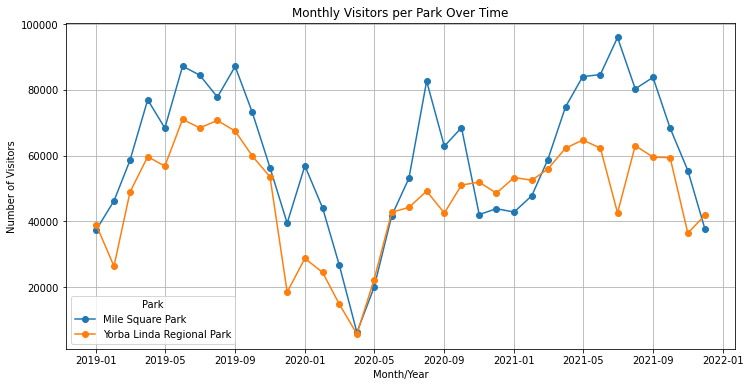

In [395]:
# Convert 'Mon/ Year' to datetime
pk['Mon/ Year'] = pd.to_datetime(pk['Mon/ Year'], format='%m/ %Y')

# Ensure 'Visitors/ Month' is treated as a string, remove commas, and convert to int64
pk['Visitors/ Month'] = pk['Visitors/ Month'].astype(str).str.replace(',', '').astype('int64')

# Pivot the DataFrame to have months as the index and parks as columns
pivot_pk = pk.pivot(index='Mon/ Year', columns='Park', values='Visitors/ Month')

# Plotting the graph
plt.figure(figsize=(12, 6))
for park in pivot_pk.columns:
    plt.plot(pivot_pk.index, pivot_pk[park], marker='o', label=park)

# Customizing the plot
plt.title('Monthly Visitors per Park Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Number of Visitors')
plt.legend(title='Park')
plt.grid(True)

# Display the plot
plt.show()

# Step 3 : Data Cleaning
- [X] Cleaning the Column Names
- [X] Dropping null values 
- [X] Change Data Types
- [X] Clean Category Column and Drop Routine Maintaince 
- [X] Clean the Status Column
- [X] Clean the Category Column 
- [X] Clean Product_Num Column


## Cleaning Columns

In [396]:
df.columns

Index(['Location', 'Down Date', 'Product', 'Description', 'Mechanic Notes',
       'Attatchment feauture', 'Status', 'Part Comment', 'Product #',
       'Reporter', 'Category', 'Last Edited', 'Last Edited by', 'Mechanic',
       '1 st attempt date', 'Edinger Part', 'Warner Part', 'Waterfront Part',
       'Yorba Part'],
      dtype='object')

In [397]:
#Renaming columns for better use cases ('Down Date' to 'Down_Date')
df = df.rename(columns = {"Down Date":"Down_Date",'Product #':'Product_Num','Last Edited':'Fixed_Date','Mechanic Notes':'Mechanic_Notes','1 st attempt date':'1stdate', 'Edinger Part':'EdingerPart', 'Warner Part':'Warnerpart', 'Waterfront Part':'WaterfrontPart',
       'Yorba Part':'YorbaPart','Part Comment':'PartComment','Attatchment feauture':'Pictures','Last Edited by':'Last_edited_by'})  
# Dropping unwanted columns 
df.drop(['Pictures','Last_edited_by','Reporter','EdingerPart', 'Warnerpart', 'WaterfrontPart', 'YorbaPart','1stdate'],axis=1, inplace=True)
# Sort values by Down_Date
df = df.sort_values('Down_Date')
# Capatalizing the first letter of the Description column
df['Description'] = df['Description'].str.capitalize()

In [398]:
df.columns

Index(['Location', 'Down_Date', 'Product', 'Description', 'Mechanic_Notes',
       'Status', 'PartComment', 'Product_Num', 'Category', 'Fixed_Date',
       'Mechanic'],
      dtype='object')

## Dropping Nulls

In [399]:
# Dropping Rows with null values based on no information in Product or Location column
df = df.dropna(subset=['Location','Product'])
df.isnull().sum()

Location            0
Down_Date           0
Product             0
Description         0
Mechanic_Notes    413
Status             89
PartComment       493
Product_Num       186
Category           85
Fixed_Date          0
Mechanic          442
dtype: int64

## Changing Data types

In [400]:
# convert 'Location', 'Categorical', 'Product', and 'Status' columns to categorical data type
df['Location'] = df['Location'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Product'] = df['Product'].astype('category')
df['Status'] = df['Status'].astype('category')

# convert 'Down_Date', 'Fixed_Date', and '1stdate' columns to pandas datetime data type
df['Down_Date'] = pd.to_datetime(df['Down_Date'])
df['Fixed_Date'] = pd.to_datetime(df['Fixed_Date'])

# convert 'description' and 'Mechanic_Notes' columns to string data type
df['Description'] = df['Description'].astype(str)
df['Mechanic_Notes'] = df['Mechanic_Notes'].astype(str)

# convert 'mechanic' column to categorical data type
df['Mechanic'] = df['Mechanic'].astype('category')

# convert 'PartComment' column to string data type
df['PartComment'] = df['PartComment'].astype(str)
print('Cleaned Data Types')
df.dtypes

Cleaned Data Types


Location                category
Down_Date         datetime64[ns]
Product                 category
Description               object
Mechanic_Notes            object
Status                  category
PartComment               object
Product_Num               object
Category                category
Fixed_Date        datetime64[ns]
Mechanic                category
dtype: object

## Category Report Column
The category column was reused for mechanics to complete routine check ups such as tightening chains for different locations, once complete the row would be unchecked weekly to be used again the next week
- [X] Replace Mechanics Attention and Mechanic to Down
    - Was used to precatch big problems before bikes were down
- [X] Fill Null values with Down 
    - The Null values was the start of the dataset with no category column till later when the API was later used
- [X] Drop maintainence routines and Cant Rent products


In [401]:
df['Category'].value_counts()

Down                   366
Maintaince              64
Mechanic                 9
Mechanics Attention      4
Cant rent                2
Name: Category, dtype: int64

In [402]:
# replace 'Mechanics attention' to 'Down'
df = df.replace('Mechanics Attention', 'Down')

# Replace Mechanic to Down
df= df.replace('Mechanic','Down')

# Fill null values with 'Down'
df['Category'] = df['Category'].fillna('Down')

# Deleting the ones that Can't be rented which would be an outliers in the dataset
df = df[df['Category'] != 'Cant rent']

# Drop rows with 'Maintenance' in the 'Category' column which was the Maintenance category
df = df[df['Category'] != 'Maintaince']


In [403]:
df['Category'].value_counts()

Down          464
Cant rent       0
Maintaince      0
Name: Category, dtype: int64

In [404]:
# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 89 to 538
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Location        464 non-null    category      
 1   Down_Date       464 non-null    datetime64[ns]
 2   Product         464 non-null    category      
 3   Description     464 non-null    object        
 4   Mechanic_Notes  464 non-null    object        
 5   Status          425 non-null    category      
 6   PartComment     464 non-null    object        
 7   Product_Num     338 non-null    object        
 8   Category        464 non-null    category      
 9   Fixed_Date      464 non-null    datetime64[ns]
 10  Mechanic        84 non-null     category      
dtypes: category(5), datetime64[ns](2), object(4)
memory usage: 29.7+ KB


## Product Number Column
- [X] Clean junk that isn't a number
- [X] Replace repair tag numbers to 0
- [X] Create a unique identifier
    - Set up sample for analysis later in specific bikes
    - template: Location/product/product_num
        - example: WaterfrontDouble_surrey5 or WFDS05


In [406]:
df['Product_Num'].value_counts()

1                       54
2                       39
4                       30
5                       26
6                       25
                        ..
1,2,13,14,12,11,10,6     1
Repair tag #7314         1
Repair tag #7310         1
Repair tag #7312         1
#6                       1
Name: Product_Num, Length: 71, dtype: int64

In [407]:
df['Product_Num'].isnull().sum()

126

In [408]:
print('Each location had product numbers. Example: (Chopper Edinger #3 was unique to location and product included)')
# Fill null values in the 'Product_Num' column with 0
df['Product_Num'] = df['Product_Num'].fillna(0)
df['Product_Num'].isnull().sum()
# Remove all non-digit characters
df['Product_Num'] = df['Product_Num'].str.extract('(\d+)', expand=False)

# Drop rows with NaN values resulting from extraction
df = df.dropna(subset=['Product_Num'])

# Convert the Product_Num column to integer
df['Product_Num'] = df['Product_Num'].astype(int)

# Dropping rows where Product_Num > 99
df = df[df['Product_Num'] <= 99]

# Display the value counts of the filtered Product_Num column
print(df['Product_Num'].value_counts())

Each location had product numbers. Example: (Chopper Edinger #3 was unique to location and product included)
1     56
2     39
4     30
5     28
6     26
3     24
8     15
7     14
9     14
10     8
0      5
11     3
17     3
12     2
13     1
46     1
50     1
Name: Product_Num, dtype: int64


Text(0.5, 1.0, 'Histogram of the reports that has product numbers')

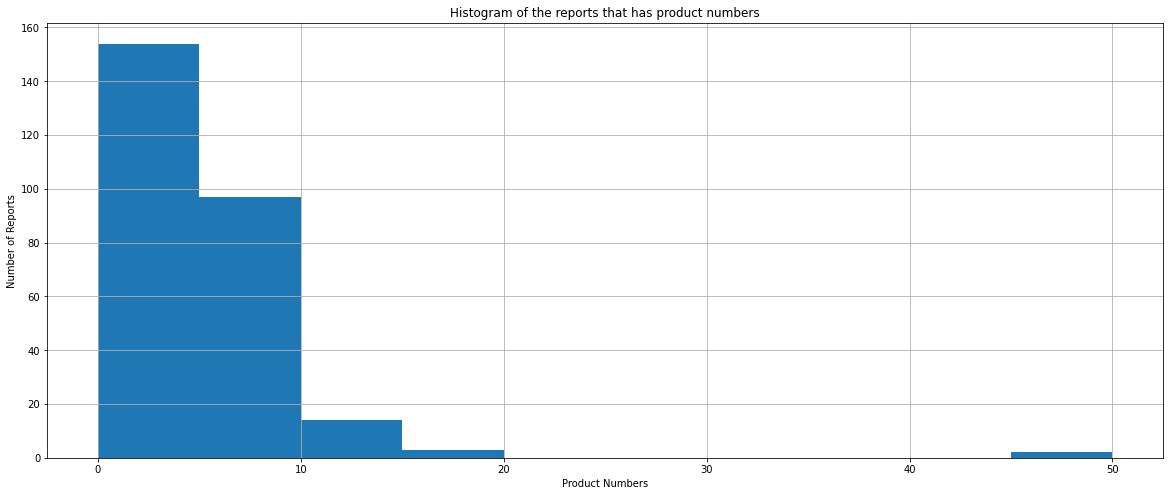

In [409]:
# Select rows where the 'Product_Num' column is not equal to '0'
numbered_products = df[df['Product_Num'] != '0']
fig, ax = plt.subplots(figsize=(20,8))
numbered_products['Product_Num'].hist(ax=ax)
# Set axis labels and plot title
ax.set_xlabel('Product Numbers')
ax.set_ylabel('Number of Reports')
ax.set_title('Histogram of the reports that has product numbers')

In [410]:
# Set Product_Num to 0 for repair tags at warner
df.loc[(df['Location'].str.contains('Warner')) & (df['Product_Num'] > 700), 'Product_Num'] = 0

# drop row where mulitple cruisers were worked since it was supposed to be maintaince and not down bikes
df.drop(df[(df['Location'].str.contains('Waterfront')) & (df['Product_Num'] > 20000)].index, inplace=True)

# the five outputs all have high number product numbers due to 
#transfers and based on the serial number  

# Step 4: Column Creations
- [X] Create a Year Month Column to categorize reports by month and year
- [X] Create a Fixed Days Column to find the number of days a product was down


## Year Month Column

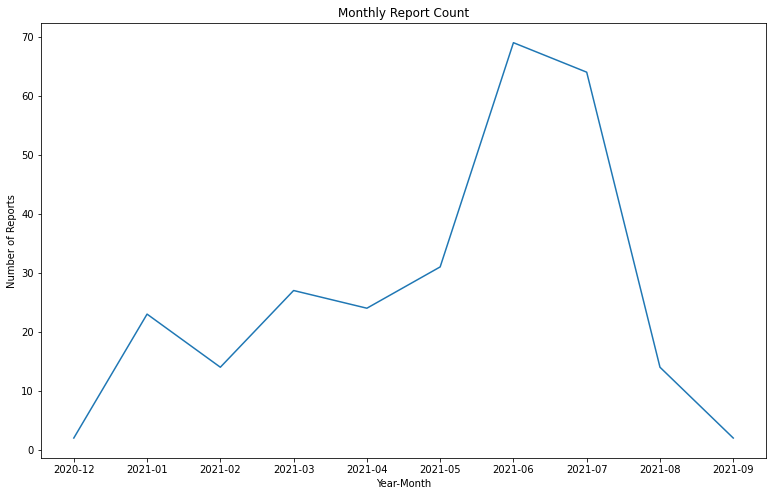

In [411]:
# Create a new column with the year and month extracted from the 'Date' column
df['YearMonth'] = df['Down_Date'].dt.strftime('%Y-%m')

# Group the data by year and month, and count the number of reports in each group
monthly_count = df.groupby('YearMonth')['Down_Date'].count()

# Plot the resulting data as a line graph
plt.figure(figsize=(13, 8))
plt.plot(monthly_count.index, monthly_count.values)

plt.xlabel('Year-Month')
plt.ylabel('Number of Reports')
plt.title('Monthly Report Count')
plt.show()


## Fixed Days Columns

Text(0.5, 1.0, 'Count of Fixed Days Historgram')

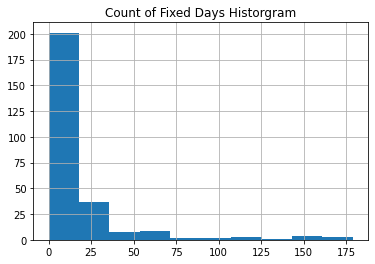

In [412]:
# Create a new column called 'fixed_days'
df['Fixed_Days'] = (df['Fixed_Date'] - df['Down_Date']).dt.days
df['Fixed_Days'].hist()
plt.title('Count of Fixed Days Historgram')

## Product Unique Identifier

In [413]:
# Convert 'Product_Num' column to numeric type
df['Product_Num'] = pd.to_numeric(df['Product_Num'], errors='coerce')

# Filter for rows with NaN values in the 'Product_Num' column
nan_product_num = df[df['Product_Num'].isna()]

# Define a lambda function to combine columns and handle missing values
combine_columns = lambda row: f"{row['Location'].replace('Waterfront', 'WA').replace('Yorba Linda', 'Y.').replace('Edinger', 'ME').replace('Warner', 'MW')}_{row['Product']}_{row['Product_Num']}" if pd.notnull(row['Product_Num']) else "98"

# Apply the lambda function to create a new column 'Location_Product_Num'
df['Unique_id'] = df.apply(combine_columns, axis=1)
df.nunique()


Location            4
Down_Date         121
Product             9
Description       213
Mechanic_Notes     48
Status             16
PartComment        16
Product_Num        17
Category            1
Fixed_Date         79
Mechanic            2
YearMonth          10
Fixed_Days         57
Unique_id         107
dtype: int64

In [414]:
df['Product_Num'].value_counts()

1     56
2     39
4     30
5     28
6     26
3     24
8     15
7     14
9     14
10     8
0      5
11     3
17     3
12     2
13     1
46     1
50     1
Name: Product_Num, dtype: int64

In [415]:
unique_count = df['Product_Num'].nunique()

## Ordered Dataframe
- Can use this for further analysis to see how ordering parts has affected reports

Text(0.5, 1.0, 'Reports that needed parts to be ordered or recieved with fixed days')

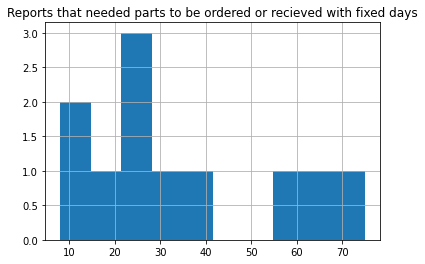

In [416]:
# Create a new DataFrame where the 'Status' column contains 'Order'
ordered_df = df[df['Status'].str.contains('Order') | df['Status'].str.contains('Received')]
ordered_df['Fixed_Days'].hist()
plt.title('Reports that needed parts to be ordered or recieved with fixed days')

# Step 5: Dealing With Outliers

## Identify Outliers


There are 26 outliers in the Fixed_Days column:


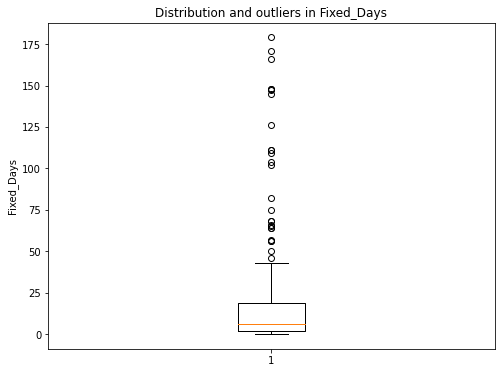

In [417]:
# Define a function to investigate outliers
def investigate_outliers(df, column):
    # Create a boxplot to visualize the distribution and outliers
    fig, ax = plt.subplots(figsize=(8,6))
    ax.boxplot(df['Fixed_Days'])
    ax.set_title(f"Distribution and outliers in {column}")
    ax.set_ylabel(column)

    # Calculate the upper and lower bounds for outliers
    q1 = df['Fixed_Days'].quantile(0.25)
    q3 = df['Fixed_Days'].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    # Count the number of outliers
    outliers = df[(df['Fixed_Days'] < lower_bound) | (df['Fixed_Days'] > upper_bound)]
    num_outliers = len(outliers)
    
    # Print the number of outliers and their details
    print(f"\nThere are {num_outliers} outliers in the {column} column:")

# Call the function to investigate outliers in the 'Days' column
investigate_outliers(df, 'Fixed_Days')


Text(0.5, 1.0, 'Identify Outliers over 35 days')

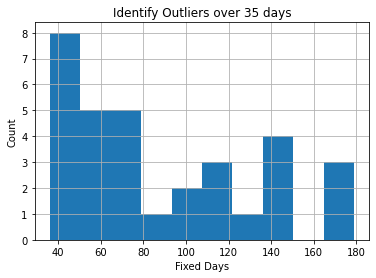

In [418]:
# Create a boolean mask to identify rows where Fixed_Days is over 35
mask = df['Fixed_Days'] > 35

# Use the mask to filter the original DataFrame and create a new variable
outliers = df[mask]

# Display the new variable
outliers['Fixed_Days'].hist()
plt.xlabel('Fixed Days')
plt.ylabel('Count')
plt.title('Identify Outliers over 35 days')


In [419]:
outliers.head()

,Location,Down_Date,Product,Description,Mechanic_Notes,Status,PartComment,Product_Num,Category,Fixed_Date,Mechanic,YearMonth,Fixed_Days,Unique_id
117,Waterfront,2021-01-26,Double Surrey,Squeaky back passenger wheel,nan,Done,nan,10,Down,2021-06-20,NaN,2021-01,145,WA_Double Surrey_10
119,Edinger,2021-01-30,Single Surrey,Needs brake adjustment,nan,"Done, Planned",nan,2,Down,2021-06-27,Robert Mounce,2021-01,148,ME_Single Surrey_2
120,Edinger,2021-01-30,Quad Sport,Bald tire,nan,"Done, Planned",nan,1,Down,2021-06-27,Robert Mounce,2021-01,148,ME_Quad Sport_1
125,Warner,2021-01-31,Deuce Coupe,Missing brake bolt,..Not to sure,"Done, Planned",nan,13,Down,2021-04-05,NaN,2021-01,64,MW_Deuce Coupe_13
123,Edinger,2021-01-31,Double Surrey,Front left wheel bent,nan,Done,nan,9,Down,2021-06-27,Robert Mounce,2021-01,147,ME_Double Surrey_9


In [420]:
outliers.tail()

,Location,Down_Date,Product,Description,Mechanic_Notes,Status,PartComment,Product_Num,Category,Fixed_Date,Mechanic,YearMonth,Fixed_Days,Unique_id
249,Waterfront,2021-05-24,Cruiser,Broken spokes,Change wheels and or add spokes,Planned,https://www.notion.so/Cruiser-rear-rim-3c4cafb...,4,Down,2021-07-06,NaN,2021-05,43,WA_Cruiser_4
262,Edinger,2021-05-27,Swan Boat,Needs a new canape,nan,"Done, Received",https://www.notion.so/Swan-Boat-Canape-c15d151...,7,Down,2021-07-07,Robert Mounce,2021-05,41,ME_Swan Boat_7
223,Waterfront,2021-05-05,Deuce Coupe,Chain needs to be looked at.,nan,Done,nan,2,Down,2021-06-20,NaN,2021-05,46,WA_Deuce Coupe_2
228,Waterfront,2021-05-08,Single Surrey,Flat tire,nan,Done,nan,5,Down,2021-06-20,NaN,2021-05,43,WA_Single Surrey_5
521,Waterfront,2021-07-31,Chopper,Loose chain,nan,Done,nan,2,Down,2021-10-05,NaN,2021-07,66,WA_Chopper_2


## Drop or Edit Outliers

In [421]:
outliers.describe()

,Product_Num,Fixed_Days
count,32.000000,32.000000
mean,5.531250,88.312500
std,4.032004,44.592374
min,0.000000,36.000000
25%,2.000000,54.500000
50%,5.000000,68.000000
75%,8.250000,114.750000
max,17.000000,179.000000


In [422]:
df.describe()

,Product_Num,Fixed_Days
count,270.000000,270.000000
mean,4.677778,17.688889
std,4.922812,31.193953
min,0.000000,0.000000
25%,2.000000,2.000000
50%,4.000000,6.000000
75%,6.000000,19.000000
max,50.000000,179.000000


In [423]:
# Group by 'Location' and find the maximum value in 'Fixed_Days'
grouped = df.groupby('Location')['Fixed_Days'].max().reset_index()

# Rename the columns for clarity
grouped.columns = ['Location', 'Max_Fixed_Days']

print(grouped)

     Location  Max_Fixed_Days
0     Edinger             179
1      Warner              64
2  Waterfront             166
3       Yorba             171


# Step 6: Analysis
## Objective of Analysis
- Analyze the frequency and types of bike breakdowns
- Evaluate the efficiency of the repair process
- Identify trends and patterns in bike maintenance and repairs
    
## Analysis Conclusions
1. Was the Maintenance Board help productivity?
   - Increasing the productivity by 83% 
   - Starting in November 2020, we reduced the weekly moving average repair time from approximately 150 days to within 50 to 0 days by March 2021. Throughout 2021, we maintained this average below 25 days even during peak months. See the Productivity section for more details.
2. Using OC Park attendence how did it correlate to Warner, Edinger and Yorba
    - 

3. ranking of location repair stats 
    1. Yorba (Average of 20 days, Median of 6 days) 
    2. Edinger (Average of 21 days, Median of 7 days)
    3. Watefront (Average of 39 days, Median of 14 days)
    4. Warner (Average of 45 days, Median of 42 days) 

4. Demonstrate reoccuring problems? Flat Tires, broken wheels, etc.?
    - Flat Tires, Broken Chains were the most reported problems, see Description Word Plot for more details
    
5. how much did having to order a part affect the repair date of the products?
6. using product_ids how do products behaves over time, dependent on attendence?


## **Productivity**

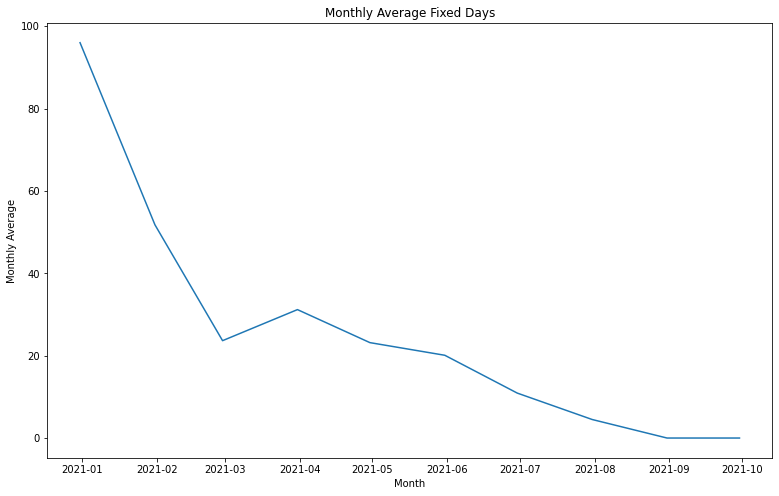

In [424]:
# group the data by month and calculate the average Days_to_Fix for each month
monthly_avg = df.groupby(pd.Grouper(key='Down_Date', freq='M'))['Fixed_Days'].mean()

# plot the time series
plt.figure(figsize=(13, 8))
plt.plot(monthly_avg)
plt.xlabel('Month')
plt.ylabel('Monthly Average')
plt.title('Monthly Average Fixed Days')
plt.show()

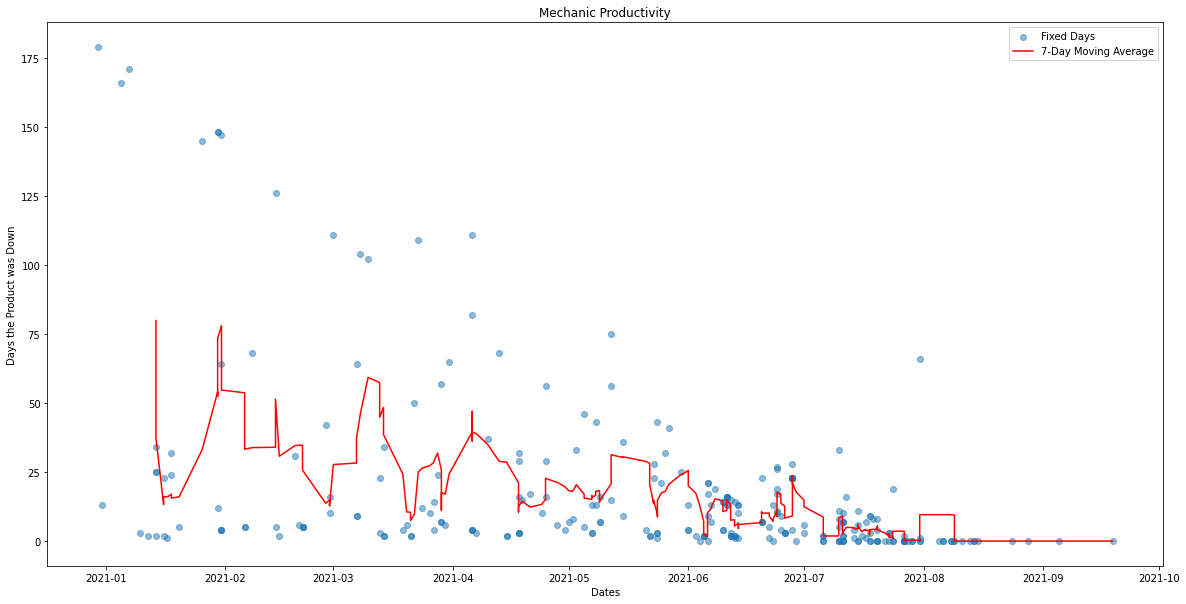

In [425]:
df = df.sort_values('Down_Date')
# Calculate the moving average
window_size = 7  
# Adjust the window size as needed
df['MovingAverage'] = df['Fixed_Days'].rolling(window=window_size).mean()

# Create the scatter plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(df['Down_Date'], df['Fixed_Days'], label='Fixed Days', alpha=0.5)

# Plot the moving average line
ax.plot(df['Down_Date'], df['MovingAverage'], color='red', label=f'{window_size}-Day Moving Average')

# Set labels and title
ax.set_xlabel('Dates')
ax.set_ylabel('Days the Product was Down')
ax.set_title('Mechanic Productivity')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [426]:
# Count the frequency of each Down_Date value and sort in descending order
date_counts = df['Down_Date'].value_counts().sort_values(ascending=False)
# Get the date with the highest count
busiest_date = date_counts.index[0]
# Count the number of reports for the busiest date
busiest_date_count = date_counts[0]
print(f"The busiest time of the year is {busiest_date} with {busiest_date_count} reports.")

The busiest time of the year is 2021-06-28 00:00:00 with 10 reports.


## General Stats

In [427]:
# Calculate average and median of whole dataset
average_fixed_days = df['Fixed_Days'].mean()
median_fixed_days = df['Fixed_Days'].median()
# Print results
print(f"Average of Fixed_days: {average_fixed_days}")
print(f"Median of Fixed_days: {median_fixed_days}")

Average of Fixed_days: 17.68888888888889
Median of Fixed_days: 6.0


In [428]:
# Calculate average and median values by location and day
grouped = df.groupby(['Location', 'Down_Date']).mean().reset_index()
average_by_location = grouped.groupby('Location')['Fixed_Days'].mean()
median_by_location = grouped.groupby('Location')['Fixed_Days'].median()
for location in df['Location'].unique():
    print(f"Location: {location}")
    print(f"Average fixed days: {average_by_location[location]}")
    print(f"Median fixed days: {median_by_location[location]}")
    print()

Location: Edinger
Average fixed days: 17.12272727272727
Median fixed days: 6.666666666666666

Location: Yorba
Average fixed days: 13.456639566395662
Median fixed days: 5.833333333333333

Location: Waterfront
Average fixed days: 26.378654970760234
Median fixed days: 13.0

Location: Warner
Average fixed days: 34.0
Median fixed days: 34.0



## Common Problems
Using the description column, we can use wordcloud to see what words are used most in the dataset, to get a picture of what were the main problems that team members reported

In [429]:
# count the number of occurrences of each unique value in the Description column
top_descriptions = df['Description'].value_counts()

# print the top 10 most frequent descriptions and their counts
print("Top Description Results:")
print(top_descriptions.head(20))

Top Description Results:
Flat tire                                        15
Bottom bracket                                    6
Sinking                                           5
Flat front tire                                   4
Chain is off                                      4
Popped tire                                       4
Chain fell off                                    4
Needs brake adjustment                            3
Broken chain                                      3
Tires                                             3
Loose chain                                       3
Chain loose                                       2
Bent pedal                                        2
The back wheel keeps hitting the bottom frame     2
Popped front tire                                 2
Boat is leaning towards one side                  2
Broken spokes                                     2
Chain                                             2
Front right tire popped                

## Description Word Cloud

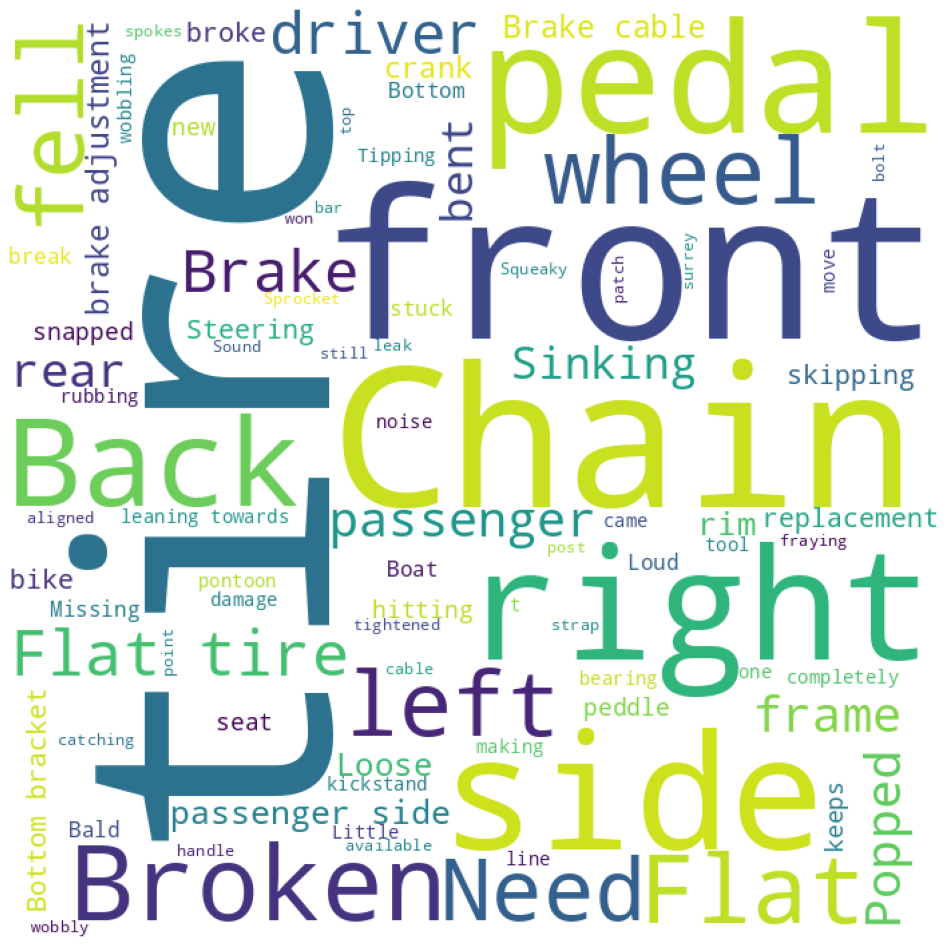

In [430]:
from wordcloud import WordCloud
all_words = ''
for arg in df["Description"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (13, 13), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Tire Related Problems Overtime

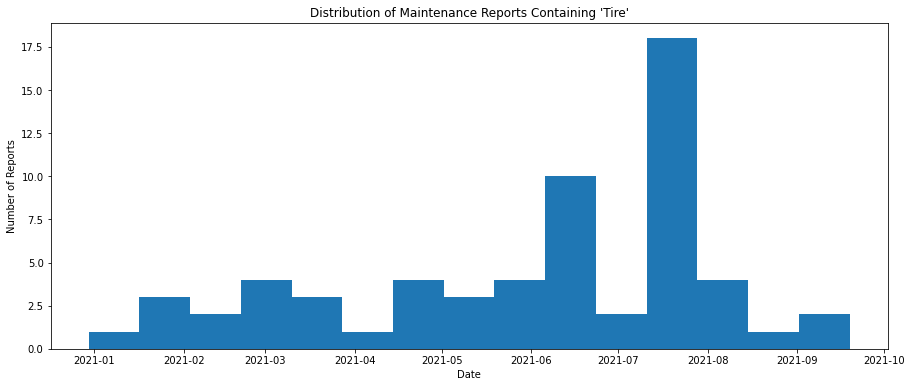

In [431]:
# Create a new column that contains a boolean value indicating whether the description contains the word "tire"
df["Has_Tire"] = df["Description"].str.contains("tire")

# Group the data by Down_Date and count the number of rows for each date that have a description containing the word "tire"
tire_counts = df.groupby("YearMonth")["Has_Tire"].sum()
# Create a histogram of the tire counts
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(df[df["Has_Tire"]]["Down_Date"], bins=15)
ax.set_title("Distribution of Maintenance Reports Containing 'Tire'")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Reports")
plt.show()

In [432]:
print(tire_counts)

YearMonth
2020-12     1
2021-01     3
2021-02     4
2021-03     6
2021-04     4
2021-05     4
2021-06    15
2021-07    19
2021-08     4
2021-09     2
Name: Has_Tire, dtype: int64


## Chain Related Problems Overtime

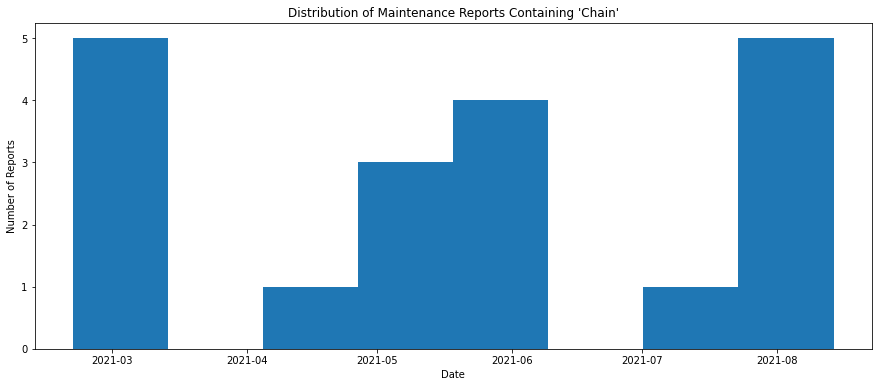

In [433]:
# Create a new column that contains a boolean value indicating whether the description contains the word "tire"
df["Has_Chain"] = df["Description"].str.contains("chain")

# Group the data by Down_Date and count the number of rows for each date that have a description containing the word "tire"
chain_counts = df.groupby("YearMonth")["Has_Chain"].sum()
# Create a histogram of the tire counts
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(df[df["Has_Chain"]]["Down_Date"], bins=8)
ax.set_title("Distribution of Maintenance Reports Containing 'Chain'")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Reports")
plt.show()

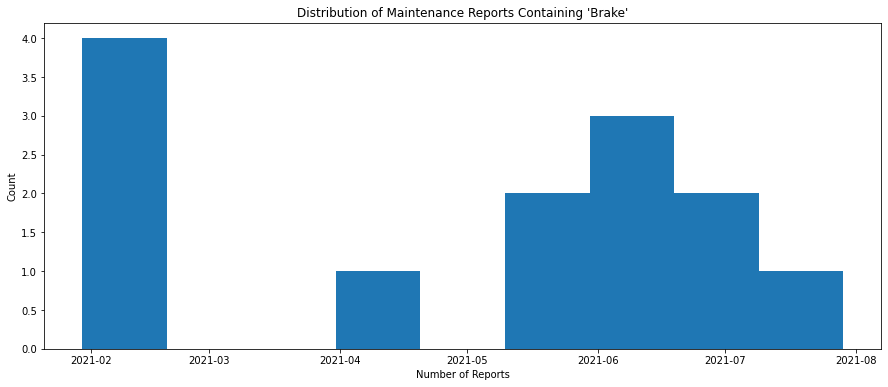

In [434]:

# Create a new column that contains a boolean value indicating whether the description contains the word "brake"
df["Has_Brake"] = df["Description"].str.contains("brake")

# Group the data by YearMonth and count the number of rows for each month that have a description containing the word "brake"
brake_counts = df.groupby("YearMonth")["Has_Brake"].sum()

# Create a histogram of the brake counts
fig, ax = plt.subplots(figsize=(15,6))
ax.hist(df[df["Has_Brake"]]["Down_Date"], bins=9)
ax.set_title("Distribution of Maintenance Reports Containing 'Brake'")
ax.set_xlabel("Number of Reports")
ax.set_ylabel("Count")
plt.show()


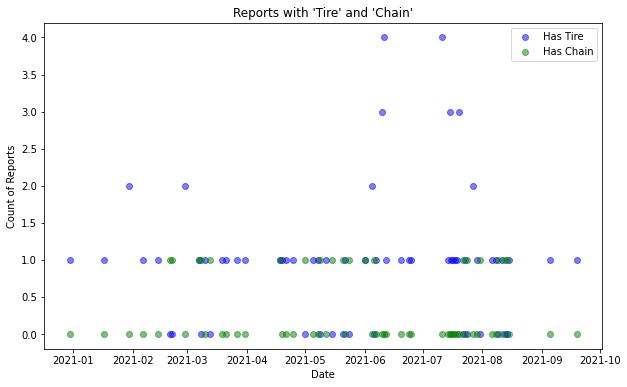

In [435]:

# Group the data by date and count the number of maintenance reports for each variable
df_count = df.groupby(["Down_Date"])[["Has_Tire", "Has_Chain"]].sum()

# Filter out any days with zero reports
df_count = df_count[(df_count.T != 0).any()]

# Create a scatter plot of the count over time for both variables
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_count.index, df_count["Has_Tire"], color='blue', alpha=0.5, label="Has Tire")
ax.scatter(df_count.index, df_count["Has_Chain"], color='green', alpha=0.5, label="Has Chain")
ax.set_title("Reports with 'Tire' and 'Chain'")
ax.set_xlabel("Date")
ax.set_ylabel("Count of Reports")
ax.legend()
plt.show()

## How did Ordering parts affect products?
How much did having to order a part affect the repair date of the products

Text(0, 0.5, 'Frequency')

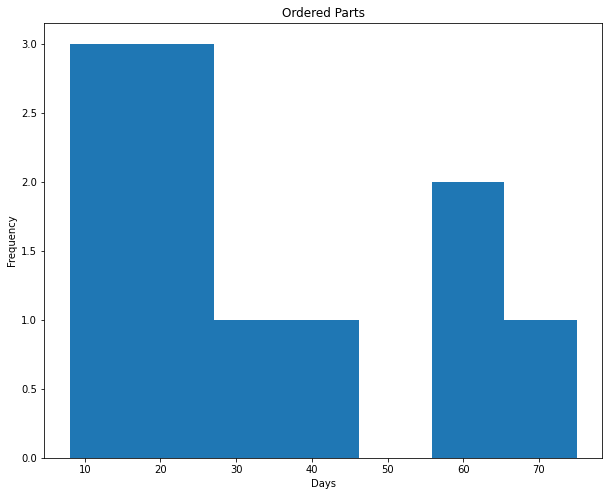

In [436]:
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(ordered_df['Fixed_Days'], bins=7)
ax.set_title("Ordered Parts")
ax.set_xlabel("Days")
ax.set_ylabel("Frequency")

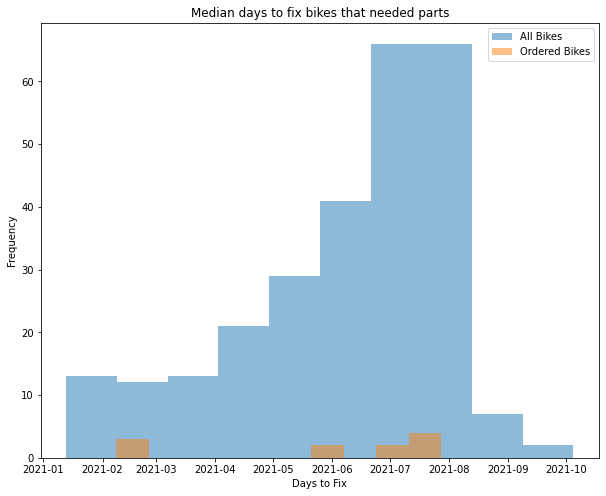

In [437]:
# Calculate the median days to fix for the entire dataset and the ordered bikes
median_all_bikes = df['Fixed_Date'].median()
median_ordered_bikes = ordered_df['Fixed_Date'].median()

# Create a histogram of days to fix for all bikes and ordered bikes
plt.figure(figsize=(10,8))
plt.hist(df['Fixed_Date'], alpha=0.5, label='All Bikes')
plt.hist(ordered_df['Fixed_Date'], alpha=0.5, label='Ordered Bikes')
plt.xlabel('Days to Fix')
plt.ylabel('Frequency')
plt.title('Median days to fix bikes that needed parts')
plt.legend()
plt.show()


## Mechanic Notes Word Cloud

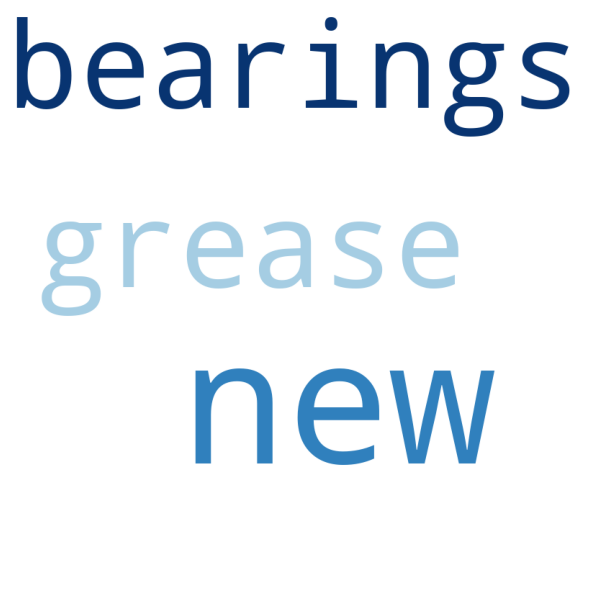

In [438]:
from wordcloud import WordCloud
# Get all words after "need" in the Mechanic_Notes column
need_words = ' '.join(df['Mechanic_Notes'].str.split('needs').str[1].dropna())
# Generate word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues').generate(need_words)

# Display word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Waterfront Fleet

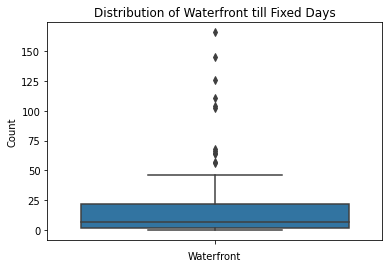

In [439]:


# Collect the data for the Waterfront location
waterfront_data = df.loc[df['Location'] == 'Waterfront', :]

# Create a boxplot of the quantity of days till the bike was fixed
sns.boxplot(data=waterfront_data, y='Fixed_Days')

# Set plot title and axis labels
plt.title('Distribution of Waterfront till Fixed Days')
plt.xlabel('Waterfront')
plt.ylabel('Count')

# Display the plot
plt.show()


# Key Performance Indicators (KPIs)

### Mean Time to Repair (MTTR)
Using the key performance indicator of MTTR, we can find the average time of the time a product is broken till the time to when its fixed using a weekly average to show the productivity of the mechancis fixing the bikes over time with the domain knowledge of summer months being the busiest.   

In [440]:
# Calculate the MTTR (Mean Time to Repair)
mttr = df['Fixed_Days'].mean()
print(f"The Mean Time To Repair for the entire dataset (MTTR) is {mttr:.0f} days.")


The Mean Time To Repair for the entire dataset (MTTR) is 18 days.


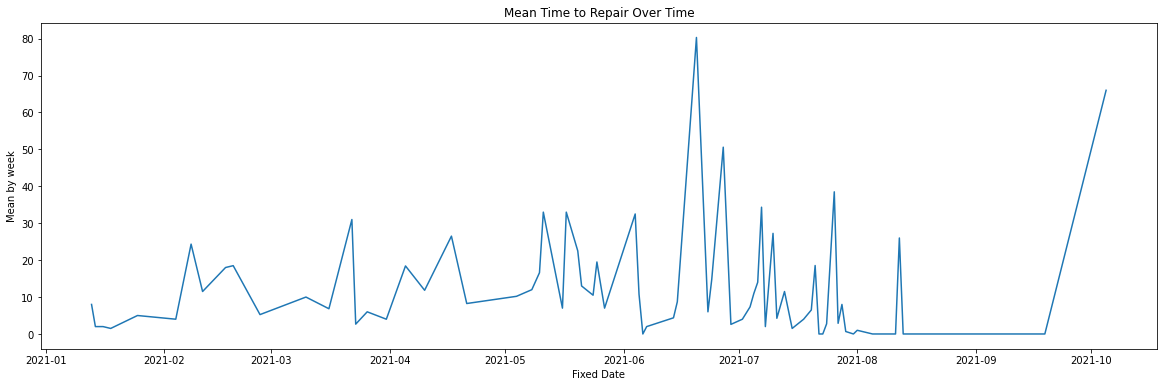

In [441]:
# Group the data by date and calculate the MTTR for each date
mttr_by_date = df.groupby('Fixed_Date')['Fixed_Days'].mean()

# Create a time series plot of the MTTR over time
plt.figure(figsize=(20,6))
plt.plot(mttr_by_date.index, mttr_by_date.values)
plt.xlabel('Fixed Date')
plt.ylabel('Mean by week')
plt.title('Mean Time to Repair Over Time')
plt.show()

# Repair Success 
Using the product Unique Identifier column we can see how the number of repairs 

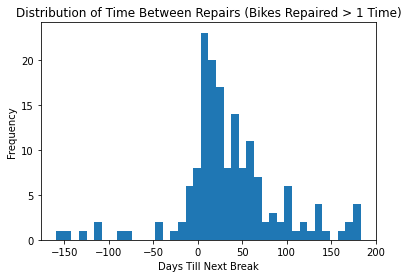

In [450]:
# Group the data by unique bike and count the number of repairs
num_repairs = df.groupby('Unique_id').size()

# Filter the data to only include bikes that have been repaired more than once
filtered_data = df[df['Unique_id'].isin(num_repairs[num_repairs > 1].index)]

# Sort the data by bike and repair date
filtered_data.sort_values(['Unique_id', 'Fixed_Date'], inplace=True)

# Calculate the time between each repair for each bike
filtered_data['Time_To_Next_Break'] = filtered_data.groupby('Unique_id')['Down_Date'].diff()

# Convert the time difference to days 
filtered_data['Time_To_Next_Break'] = filtered_data['Time_To_Next_Break'].dt.days

# Drop the first row for each bike (since it doesn't have a previous repair date)
filtered_data = filtered_data.groupby('Unique_id').apply(lambda x: x.iloc[1:])

# Plot the distribution of time between repairs
plt.hist(filtered_data['Time_To_Next_Break'], bins=40)
plt.xlabel('Days Till Next Break')
plt.ylabel('Frequency')
plt.title('Distribution of Time Between Repairs (Bikes Repaired > 1 Time)')
plt.show()


Explanation:
Looking at this histogram in how bikes when fixed would break again would break down again and the space between them was mostly within the same month.
I wonder if I can narrow my scope within a month 

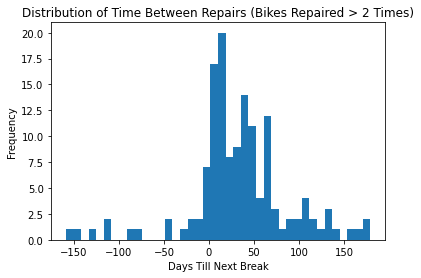

In [451]:
# Group the data by unique bike and count the number of repairs
num_repairs = df.groupby('Unique_id').size()

# Filter the data to only include bikes that have been repaired more than 2 times
filtered_data = df[df['Unique_id'].isin(num_repairs[num_repairs > 2].index)]

# Sort the data by bike and repair date
filtered_data.sort_values(['Unique_id', 'Fixed_Date'], inplace=True)

# Calculate the time between each repair for each bike
filtered_data['Time_To_Next_Break'] = filtered_data.groupby('Unique_id')['Down_Date'].diff()

# Convert the time difference to days 
filtered_data['Time_To_Next_Break'] = filtered_data['Time_To_Next_Break'].dt.days

# Drop the first row for each bike (since it doesn't have a previous repair date)
filtered_data = filtered_data.groupby('Unique_id').apply(lambda x: x.iloc[1:])

# Plot the distribution of time between repairs
plt.hist(filtered_data['Time_To_Next_Break'], bins=40)
plt.xlabel('Days Till Next Break')
plt.ylabel('Frequency')
plt.title('Distribution of Time Between Repairs (Bikes Repaired > 2 Times)')
plt.show()

# The Most Prone Bike to Break 

In [443]:
# Group the data by unique bike and count the number of repairs
num_repairs = df.groupby('Unique_id').size()

# Sort the result in descending order
most_repaired_bike = df['Unique_id'].value_counts().index[1]
print(f"The bike with the most repairs is {most_repaired_bike}")


The bike with the most repairs is WA_Single Surrey_6


In [444]:
df.head()

,Location,Down_Date,Product,Description,Mechanic_Notes,Status,PartComment,Product_Num,Category,Fixed_Date,Mechanic,YearMonth,Fixed_Days,Unique_id,MovingAverage,Has_Tire,Has_Chain,Has_Brake
73,Edinger,2020-12-30,Double Surrey,Bald tires,nan,Done,nan,3,Down,2021-06-27,Robert Mounce,2020-12,179,ME_Double Surrey_3,NaN,True,False,False
76,Yorba,2020-12-31,Swan Boat,Tipping on left side,nan,Done,nan,4,Down,2021-01-13,NaN,2020-12,13,Yorba_Swan Boat_4,NaN,False,False,False
78,Waterfront,2021-01-05,Single Surrey,Brake adjustment,nan,Done,nan,6,Down,2021-06-20,NaN,2021-01,166,WA_Single Surrey_6,NaN,False,False,False
82,Yorba,2021-01-07,Double Surrey,Back passenger side metal scrapping😰,nan,Done,nan,8,Down,2021-06-27,Robert Mounce,2021-01,171,Yorba_Double Surrey_8,NaN,False,False,False
89,Yorba,2021-01-10,Double Surrey,Loud screeching while pedaling,nan,Done,nan,8,Down,2021-01-13,NaN,2021-01,3,Yorba_Double Surrey_8,NaN,False,False,False


## Park Attendence

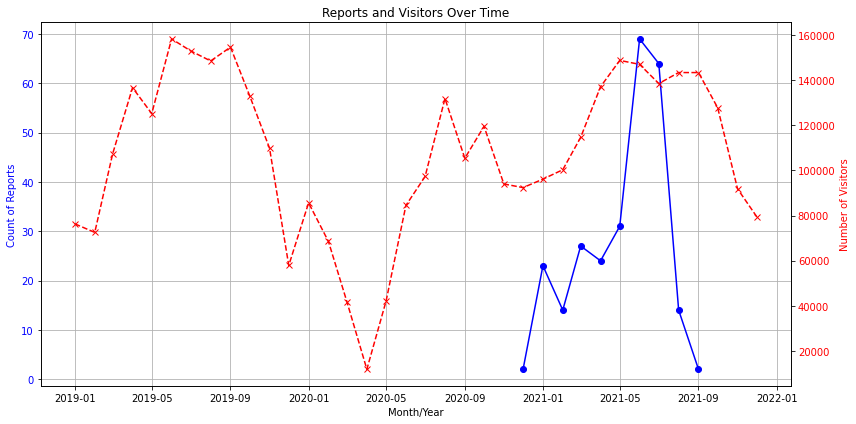

In [445]:
# Convert 'YearMonth' and 'Mon/ Year' to datetime
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')
pk['Mon/ Year'] = pd.to_datetime(pk['Mon/ Year'], format='%m/%Y')

# Count the reports by 'YearMonth'
reports_count = df.groupby('YearMonth').size()

# Ensure 'Visitors/ Month' is treated as a string, remove commas, and convert to int64
pk['Visitors/ Month'] = pk['Visitors/ Month'].astype(str).str.replace(',', '').astype('int64')

# Sum visitors by 'Mon/ Year'
visitors_sum = pk.groupby('Mon/ Year')['Visitors/ Month'].sum()

# Plotting the dual-axis graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the reports count on the first y-axis
ax1.plot(reports_count.index, reports_count, marker='o', color='b', label='Reports')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Count of Reports', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the visitors count on the second y-axis
ax2.plot(visitors_sum.index, visitors_sum, marker='x', linestyle='--', color='r', label='Visitors')
ax2.set_ylabel('Number of Visitors', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Customizing the plot
plt.title('Reports and Visitors Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap

# Display the plot
plt.show()


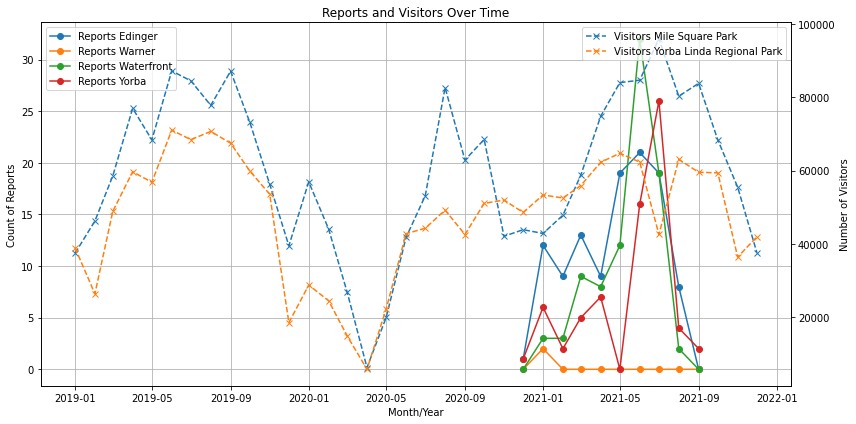

In [446]:
# Convert 'YearMonth' and 'Mon/ Year' to datetime
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')
pk['Mon/ Year'] = pd.to_datetime(pk['Mon/ Year'], format='%m/%Y')

# Ensure 'Visitors/ Month' is treated as a string, remove commas, and convert to int64
pk['Visitors/ Month'] = pk['Visitors/ Month'].astype(str).str.replace(',', '').astype('int64')

# Group by 'YearMonth' and 'Location' and count the reports
reports_count = df.groupby(['YearMonth', 'Location']).size().unstack(fill_value=0)

# Group by 'Mon/ Year' and 'Park' and sum the visitors
visitors_sum = pk.groupby(['Mon/ Year', 'Park'])['Visitors/ Month'].sum().unstack(fill_value=0)

# Plotting the dual-axis graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the reports count on the first y-axis for each location
for location in reports_count.columns:
    ax1.plot(reports_count.index, reports_count[location], marker='o', label=f'Reports {location}')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Count of Reports')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the visitors count on the second y-axis for each park
for park in visitors_sum.columns:
    ax2.plot(visitors_sum.index, visitors_sum[park], marker='x', linestyle='--', label=f'Visitors {park}')
ax2.set_ylabel('Number of Visitors')
ax2.legend(loc='upper right')

# Customizing the plot
plt.title('Reports and Visitors Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap

# Display the plot
plt.show()

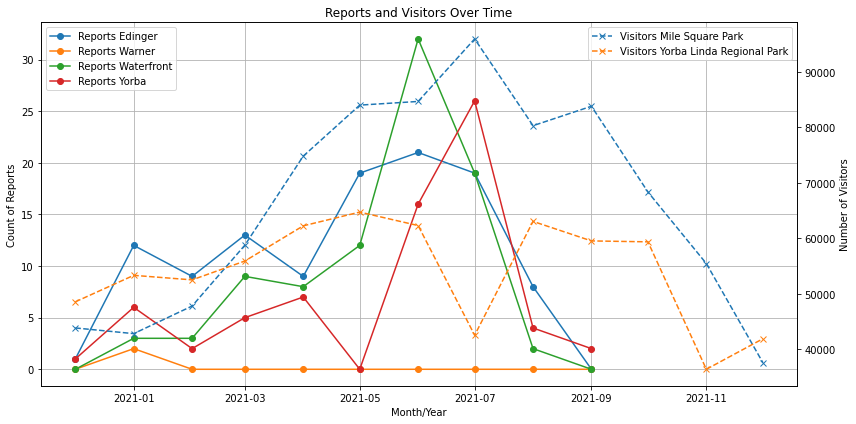

In [447]:
# Filter the data to the range from '2021-05-01' to '2021-08-31'
df_summer = df[(df['Down_Date'] >= '2021-05-01') & (df['Down_Date'] <= '2021-08-31')]
pk_summer = pk[(pk['Mon/ Year'] >= '2021-05') & (pk['Mon/ Year'] <= '2021-08')]

# Group by 'Down_Date' and count the reports
reports_count = df_filtered.groupby('Down_Date').size()

# Sum visitors by 'Date'
visitors_sum = pk_filtered.groupby('Mon/ Year')['Visitors / day'].sum()

# Filter 'pk' to start from '2020-12'
pk = pk[pk['Mon/ Year'] >= '2020-12-01']
# Group by 'YearMonth' and 'Location' and count the reports
reports_count = df.groupby(['YearMonth', 'Location']).size().unstack(fill_value=0)

# Group by 'Mon/ Year' and 'Park' and sum the visitors
visitors_sum = pk.groupby(['Mon/ Year', 'Park'])['Visitors/ Month'].sum().unstack(fill_value=0)

# Plotting the dual-axis graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the reports count on the first y-axis for each location
for location in reports_count.columns:
    ax1.plot(reports_count.index, reports_count[location], marker='o', label=f'Reports {location}')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Count of Reports')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the visitors count on the second y-axis for each park
for park in visitors_sum.columns:
    ax2.plot(visitors_sum.index, visitors_sum[park], marker='x', linestyle='--', label=f'Visitors {park}')
ax2.set_ylabel('Number of Visitors')
ax2.legend(loc='upper right')

# Customizing the plot
plt.title('Reports and Visitors Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap

# Display the plot
plt.show()

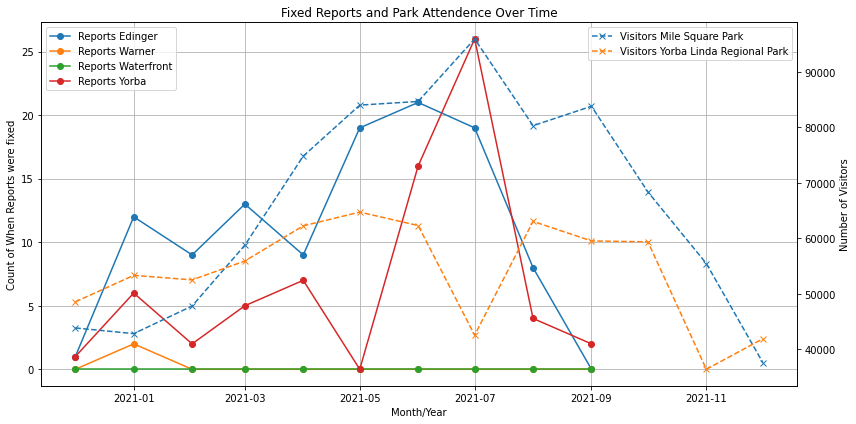

In [448]:
# Filter the data to the range from '2021-05-01' to '2021-08-31'
df_summer = df[(df['Fixed_Date'] >= '2021-05-01') & (df['Fixed_Date'] <= '2021-08-31')]
pk_summer = pk[(pk['Mon/ Year'] >= '2021-05') & (pk['Mon/ Year'] <= '2021-08')]

# Filter out waterfront since we dont have the attendence
df_summer = df[df['Location'] != 'Waterfront']

# Group by 'Down_Date' and count the reports
reports_count = df_summer.groupby('Fixed_Date').size()

# Sum visitors by 'Date'
visitors_sum = pk_summer.groupby('Mon/ Year')['Visitors / day'].sum()

# Filter 'pk' to start from '2020-12'
pk = pk[pk['Mon/ Year'] >= '2020-12-01']
# Group by 'YearMonth' and 'Location' and count the reports
reports_count = df_summer.groupby(['YearMonth', 'Location']).size().unstack(fill_value=0)

# Group by 'Mon/ Year' and 'Park' and sum the visitors
visitors_sum = pk.groupby(['Mon/ Year', 'Park'])['Visitors/ Month'].sum().unstack(fill_value=0)

# Plotting the dual-axis graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the reports count on the first y-axis for each location
for location in reports_count.columns:
    ax1.plot(reports_count.index, reports_count[location], marker='o', label=f'Reports {location}')
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Count of When Reports were fixed')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the visitors count on the second y-axis for each park
for park in visitors_sum.columns:
    ax2.plot(visitors_sum.index, visitors_sum[park], marker='x', linestyle='--', label=f'Visitors {park}')
ax2.set_ylabel('Number of Visitors')
ax2.legend(loc='upper right')

# Customizing the plot
plt.title('Fixed Reports and Park Attendence Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap

# Display the plot
plt.show()

## Correlation

Correlation Matrix:
               Reports_Count  Visitors_Sum
Reports_Count       1.000000     -0.219593
Visitors_Sum       -0.219593      1.000000


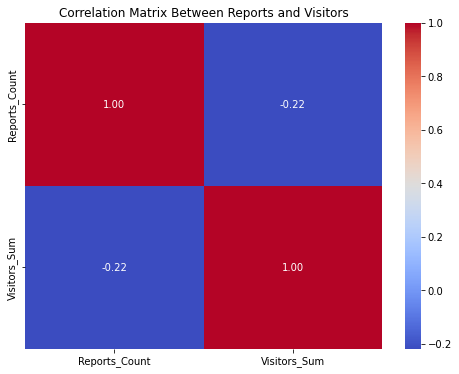

In [449]:
# Aggregate data by date
reports_count = df_filtered.groupby('YearMonth').size().reset_index(name='Reports_Count')
visitors_sum = pk_filtered.groupby('Mon/ Year')['Visitors / day'].sum().reset_index(name='Visitors_Sum')

# Merge the two datasets on date
merged_df = pd.merge(reports_count, visitors_sum, left_on='YearMonth', right_on='Mon/ Year').drop(columns=['Mon/ Year'])

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Reports and Visitors')
plt.show()